# Credit Card Usage Data

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Import Clustering models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Load Data 

In [2]:
#Load Dataset
data = pd.read_csv('CC GENERAL.csv')

Data Dictionary:

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 

PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid

CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRC_FULL_PAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

## EDA 

In [3]:
#Check first 5 records of dataset
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Find out about fields and its data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#Check on the numerical fields of the dataset 
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#Check for the numbers of null values
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#Check for duplicated rows
data.duplicated().sum()

0

## Data Preparation 

Since we are working on a clustering, we do not need the field CUST_ID as it is used to identify each unique customer, and we do not want the clustering algorithm consider this field. Thus, we will drop this field.

In [8]:
#Drop CUST_ID field
data.drop(['CUST_ID'], axis=1, inplace=True)

CREDIT_LIMIT field has 1 null value, we will replace it with the mean.

In [9]:
#Replace null value in CREDIT_LIMIT field with mean
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

MINIMUM_PAYMENTS field has 313 null values, we will replace it with the mean.

In [10]:
#Replace null values in CREDIT_LIMIT field with mean
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [11]:
#Check for null values after replacements
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
#Define a function to plot all the numerical fields in dataframe
def shaded_density_plot(dataframe):
    
    #Define plot size 
    plt.figure(figsize=(20,50))
    
    #Set Grid style 
    sns.set(style="darkgrid")
    
    #Find out the number of numerical fields and take the rounded value after divison of 2
    #Set as variable, to use this as x-axis of subplots
    subplot_xaxis = math.ceil(len(list(data.select_dtypes(exclude=['object']).columns))/2)
    
    #Loop through numerical columns in dataframe and plot density plot
    for i, col in enumerate(dataframe.columns):
        if dataframe[col].dtype != 'object':
            #Defining the subplot configuration and placement
            ax = plt.subplot(subplot_xaxis, 2, i+1)
            sns.kdeplot(dataframe[col], ax=ax, shade=True)
            plt.xlabel(col)
    plt.show()

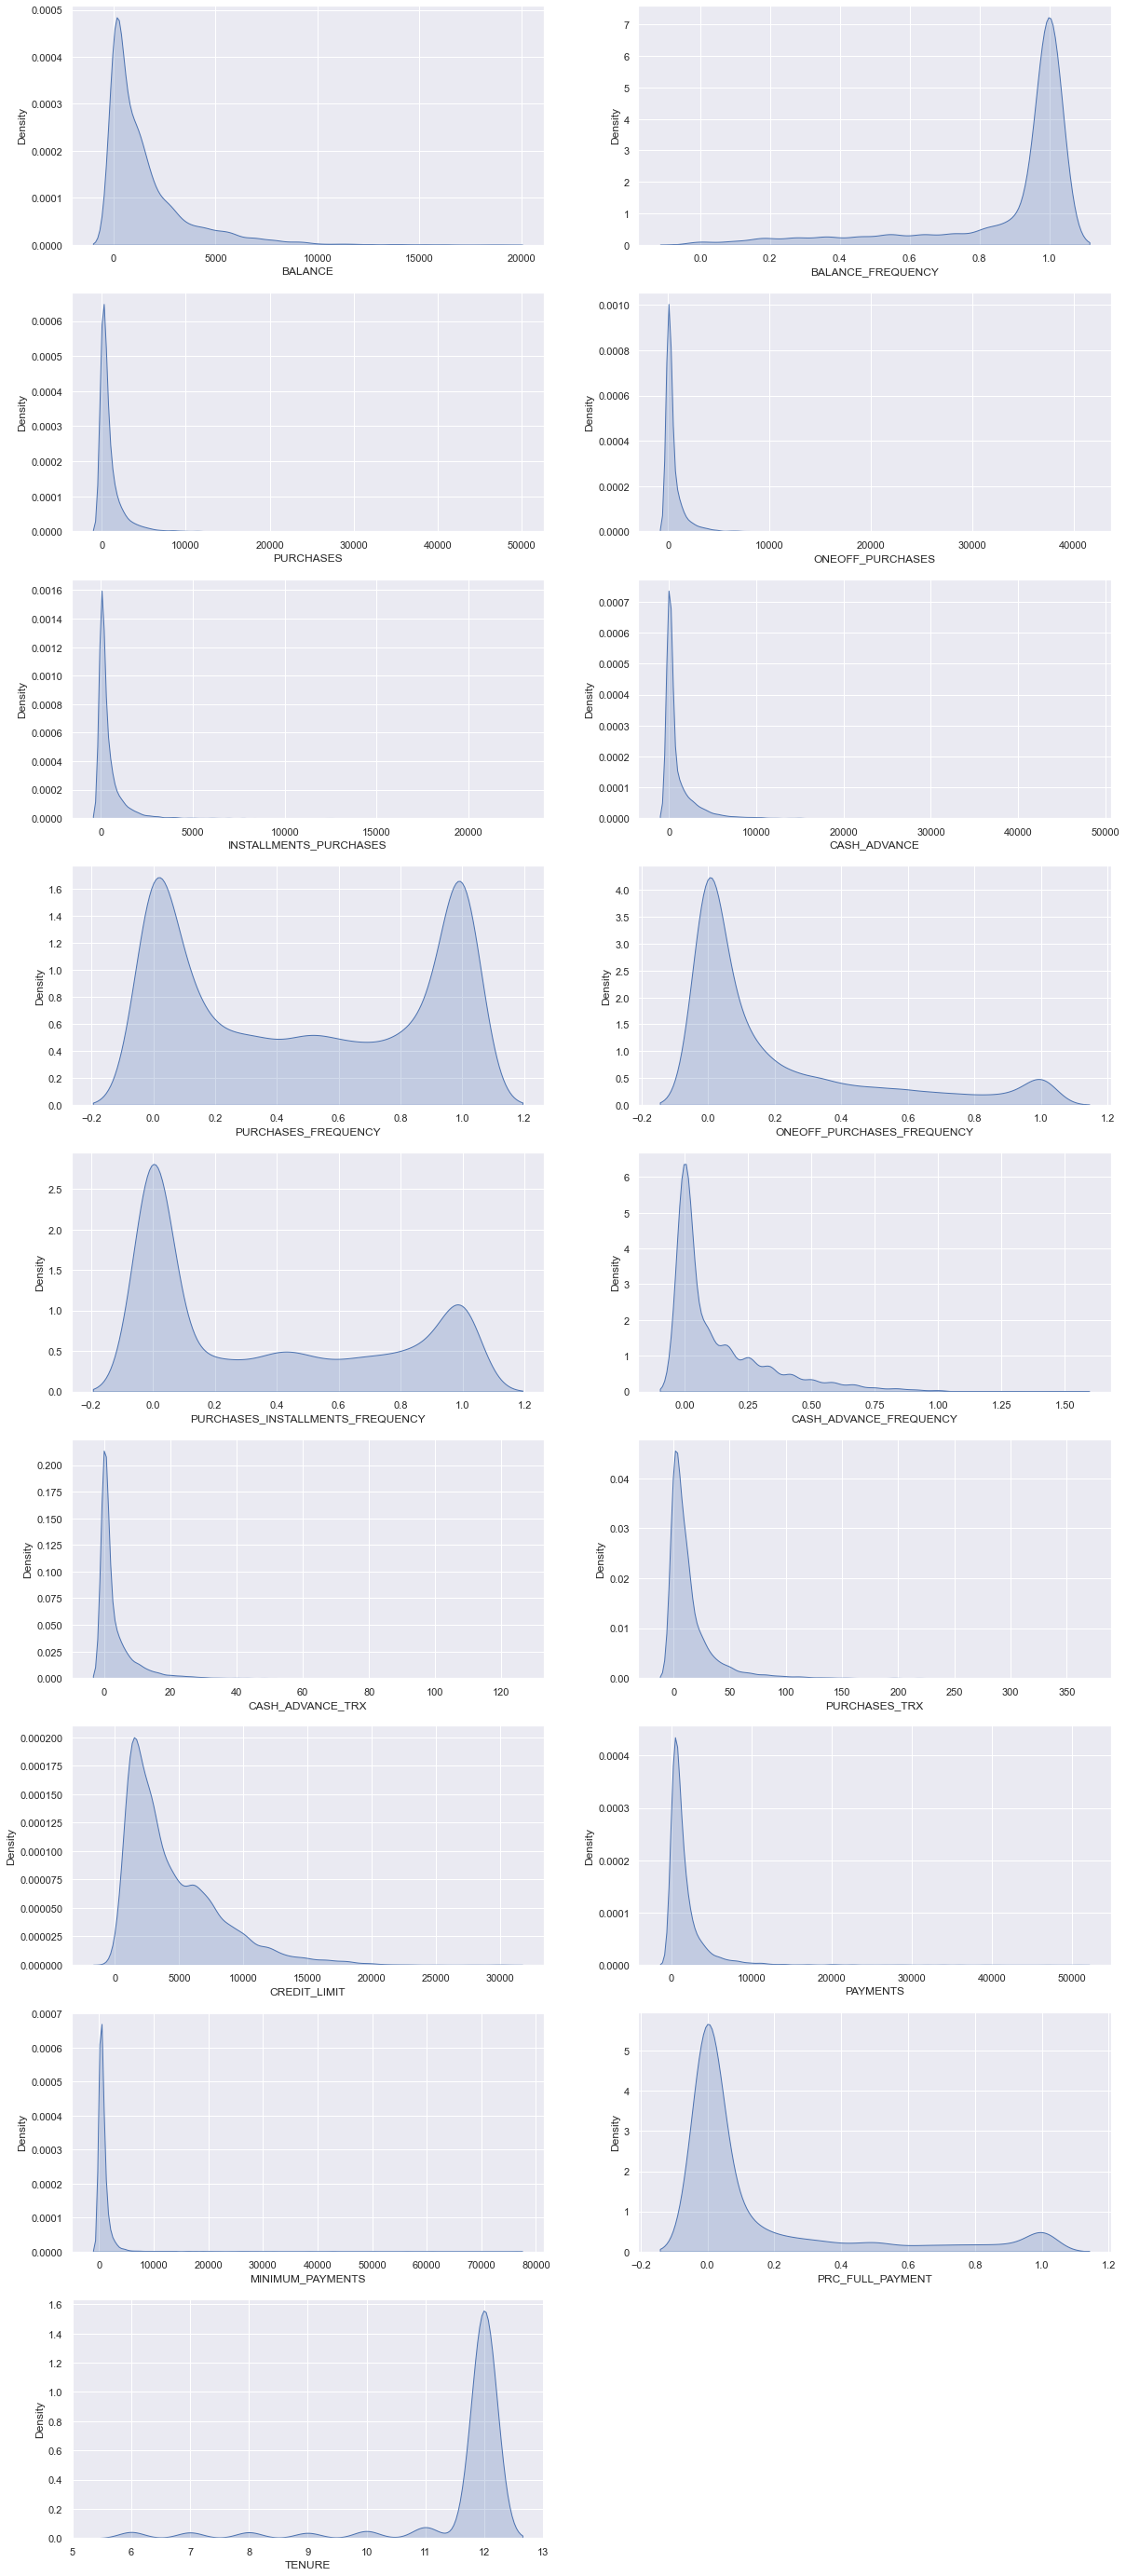

In [13]:
#Using user-defined function to visualize the distribution of values in each numerical field of the dataframe 
shaded_density_plot(data)

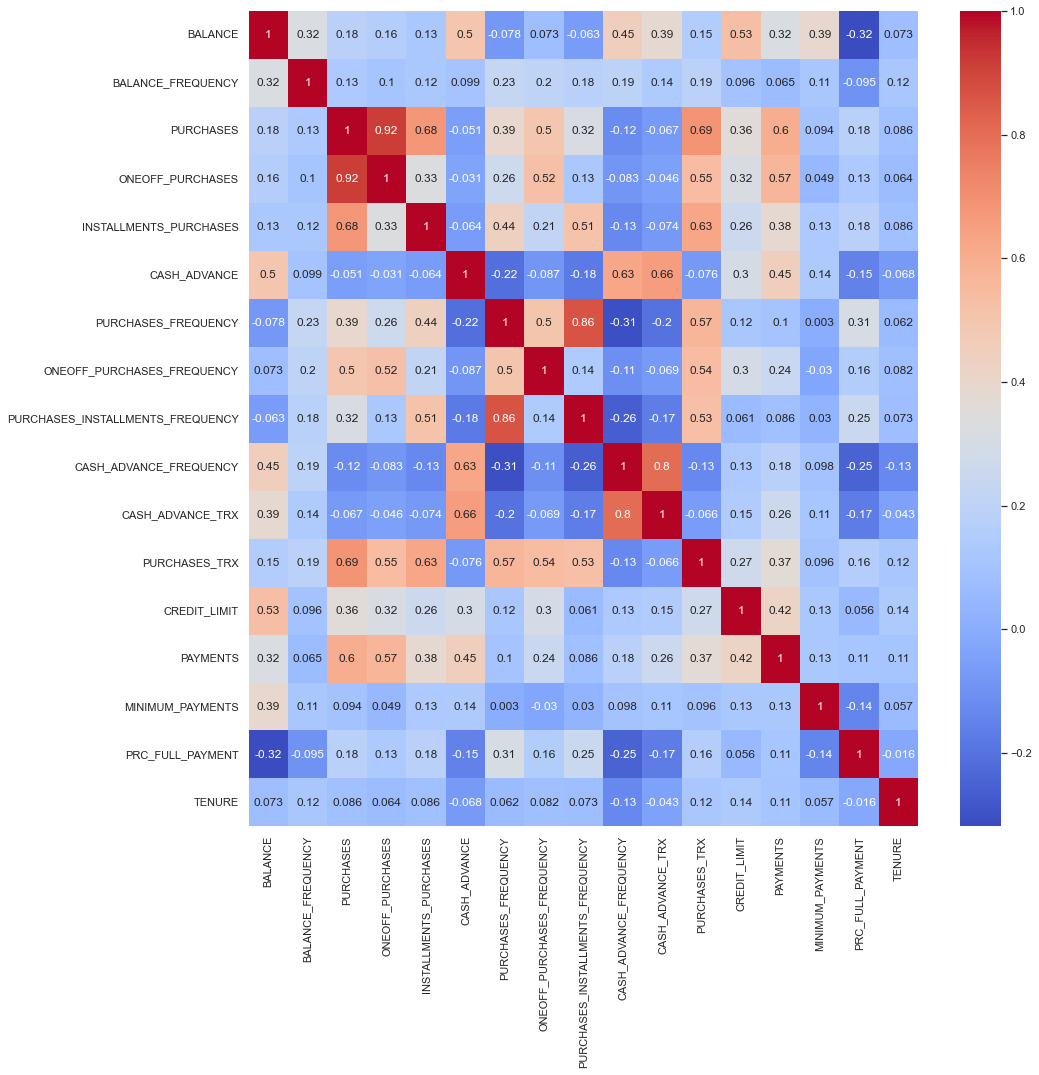

In [14]:
#Plot correlation of fields using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap = "coolwarm", annot=True)
plt.show()

## Using PCA to reduce dimensionality 

In [15]:
#As there is some correlation between the features, using PCA to reduce the dimensionality that 
#would explains 95% of data
pca = PCA(n_components=0.95)
data_scaled_pca = pca.fit_transform(data)

In [47]:
data_scaled_pca_df = pd.DataFrame(data_scaled_pca)

In [48]:
data_scaled_pca_df.head()

,0,1,2,3,4
0,-4326.383956,921.566884,183.708365,-168.948265,47.629700
1,4118.916676,-2432.846347,2369.969306,-3922.117128,59.029537
2,1497.907660,-1997.578692,-2125.631345,1028.943565,-313.696195
3,1394.548556,-1488.743450,-2431.799668,1594.073673,-302.200788
4,-3743.351874,757.342659,512.476474,-243.154764,-237.678261


## Finding best K value for KMeans - Elbow Method

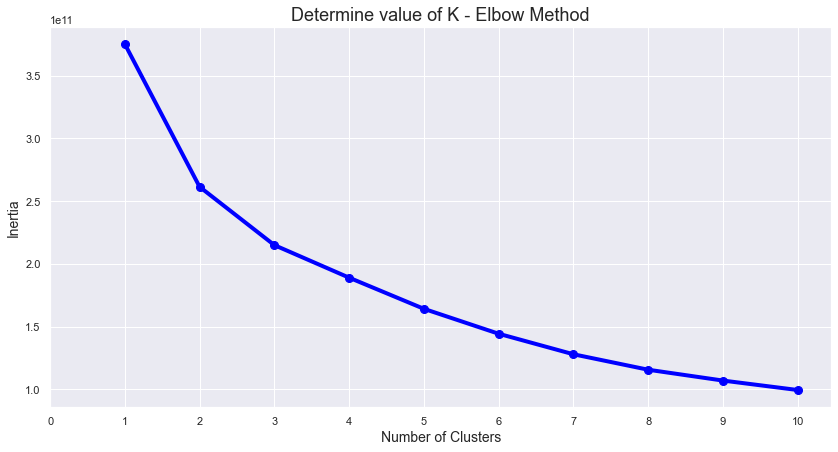

In [16]:
#Initialize empty list
inertia = []

#Loop through from 1 to 10 of clusters, using KMeans model
for i in range(1,11):
    model = KMeans(n_clusters=i,  random_state=1).fit(data_scaled_pca)
    inertia.append(model.inertia_)

fig = plt.figure(figsize = (14,7))
plt.plot(range(1,11), inertia, linewidth=4, markersize=8, marker='o', color = 'blue')
plt.title("Determine value of K - Elbow Method", fontsize = 18)
plt.xticks(np.arange(11))
plt.xlabel("Number of Clusters", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.show()

## Finding best K value for KMeans - Silhouette Score

Silhouette refers to a method of interpretation and validation of consistency within clusters of data.

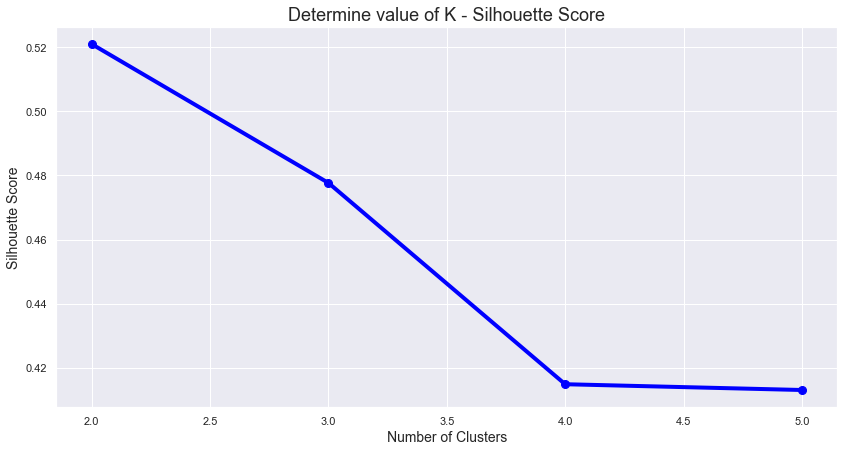

In [20]:
#Initialize empty list
silhouette_scores = []

#Loop through from 2 to 6 of clusters, using KMeans model
for i in range(2,6):
    silhouette_scores.append( 
        silhouette_score(data_scaled_pca, KMeans(n_clusters = i, random_state = 1).fit_predict(data_scaled_pca)))

fig = plt.figure(figsize = (14,7))
plt.plot(range(2,6), silhouette_scores, linewidth=4, markersize=8, marker='o', color = 'blue')
plt.title("Determine value of K - Silhouette Score", fontsize = 18)
#plt.xticks([2,3,4,5])
plt.xlabel("Number of Clusters", fontsize = 14)
plt.ylabel("Silhouette Score", fontsize = 14)
plt.show()

## Fitting the KMeans Model

In [21]:
#Fit KMeans model with 2 clusters
K2_model = KMeans(n_clusters=2, random_state=1)
K2_model.fit(data_scaled_pca)

KMeans(n_clusters=2, random_state=1)

In [22]:
#Fit KMeans model with 3 clusters
K3_model = KMeans(n_clusters=3, random_state=1)
K3_model.fit(data_scaled_pca)

KMeans(n_clusters=3, random_state=1)

## Using PCA to reduce dimensionality for visualisation

In [25]:
pca_2d= PCA(n_components=2)
principal_comp=pca_2d.fit_transform(data_scaled_pca)
pca_df=pd.DataFrame(data=principal_comp,columns=["PCA1","PCA2"])
pca_df.head()

,PCA1,PCA2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659


## Visualizing the Clusters - KMeans 

### 2 Clusters 

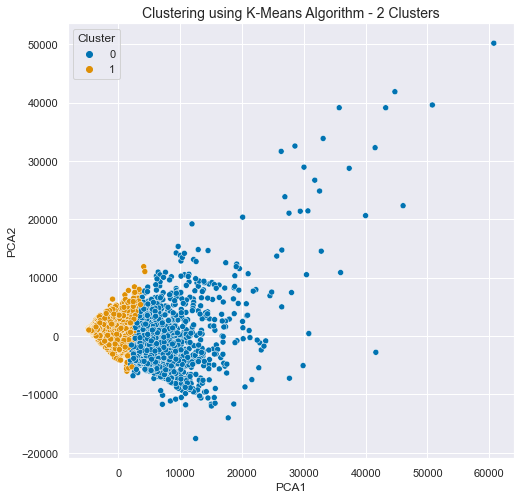

In [34]:
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'Cluster':K2_model.labels_})],axis=1)
#visualize the clustered dataframe
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=pca_df_kmeans,palette='colorblind')
plt.title("Clustering using K-Means Algorithm - 2 Clusters", fontsize =14)
plt.show()

### 3 Clusters 

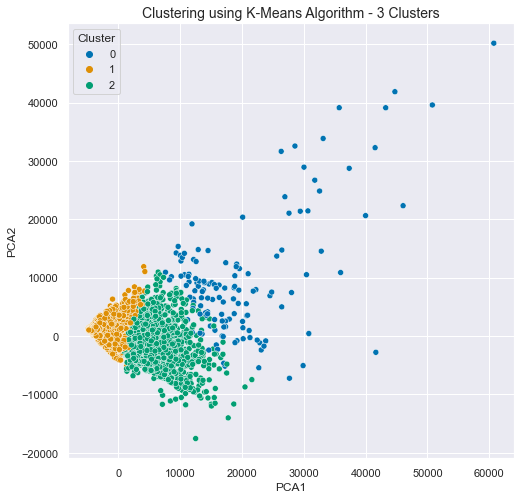

In [35]:
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'Cluster':K3_model.labels_})],axis=1)
# visualize the clustered dataframe
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=pca_df_kmeans, palette='colorblind')
plt.title("Clustering using K-Means Algorithm - 3 Clusters", fontsize =14)
plt.show()

## Visualize the cluster with 2 features 

In [36]:
data['CLUSTER']=K3_model.labels_

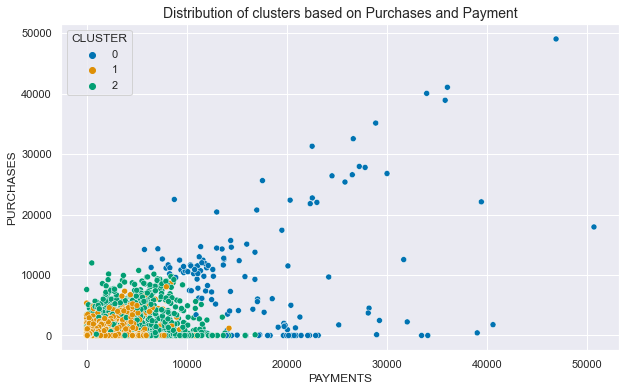

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='PAYMENTS', y='PURCHASES', hue='CLUSTER',  palette='colorblind')
plt.title('Distribution of clusters based on Purchases and Payment', fontsize =14)
plt.show()

## Agglomerative Clustering 

In [45]:
#Defining a function to run the model multiple times based on parameters given
def Train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : Clusters : ",k," Linkage : ",linkage," Silhouette score : ",silhouette_score(X,y_pred))

In [46]:
clusters=[3,4,5,6]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
    for i in clusters:
        Train_Agglomerative(lin,i,data_scaled_pca)

Agglomerative Clustering : clusters :  3  Linkage :  ward  Silhouette score :  0.4761823505266689
Agglomerative Clustering : clusters :  4  Linkage :  ward  Silhouette score :  0.2732865911875845
Agglomerative Clustering : clusters :  5  Linkage :  ward  Silhouette score :  0.2927607699277032
Agglomerative Clustering : clusters :  6  Linkage :  ward  Silhouette score :  0.30092289140448736
Agglomerative Clustering : clusters :  3  Linkage :  complete  Silhouette score :  0.8220599594501339
Agglomerative Clustering : clusters :  4  Linkage :  complete  Silhouette score :  0.8217540917613095
Agglomerative Clustering : clusters :  5  Linkage :  complete  Silhouette score :  0.7858188377177607
Agglomerative Clustering : clusters :  6  Linkage :  complete  Silhouette score :  0.7851335313928153
Agglomerative Clustering : clusters :  3  Linkage :  average  Silhouette score :  0.8872219017857182
Agglomerative Clustering : clusters :  4  Linkage :  average  Silhouette score :  0.85414132472391

## Visualizing the Clusters - Agglomerative Clustering

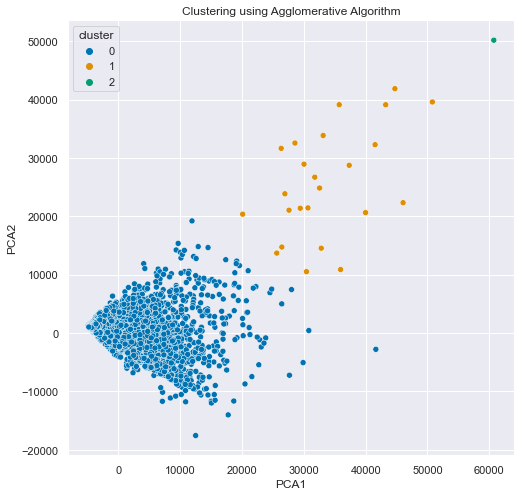

In [51]:
agglo_model = AgglomerativeClustering(linkage='average',n_clusters=3)
y_pred = agglo_model.fit_predict(pca_df)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_aglo,palette='colorblind')
plt.title("Clustering using Agglomerative Algorithm", fontsize =14)
plt.show()